In [1]:
#How Covid-19 impacted the Irish population.
#*migration
#*immigration
#*emmigration
#*deaths
#*births

#rental / house price changes compared to migration changes
#calc avg std dev migration and then do how many years are 1 dev out, 2 dev out, 3 dev out and itll be normal distribution
#Stats - Does The change of house prices affect migration? duel axis line chart.
#      - immegration is hard to determine as there are many factors why other countries will come into ireland so we will only           look at migration
    #  - 3 graphs. immegration vs migration. pie chart for migration ages. migration vs house prices. maybe graph oh migration over 5 years vs 35 to show law of large numbers

In [2]:
#Importing libraries to use later on. reading in my csv files using a pandas function


import pandas as pd
import statistics as stats
import numpy as np
import re
import matplotlib.pyplot as plt
from scipy.stats import norm
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats.mstats import winsorize
import scipy.stats as stats
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,explained_variance_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict, StratifiedKFold, learning_curve)

from statsmodels.tools.eval_measures import mse, rmse
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

Population = pd.read_csv("EstimatedPopulation.csv")
Emigration = pd.read_csv("EstimatedEmigration.csv")
Migration = pd.read_csv("Migrationbycountry.csv")
propertyprice = pd.read_csv("form_41a-price-new-property-area-by_year_2.csv")
Populationireland = pd.read_csv("ireland-life-expectancy.csv")
LifeExpectancy2 = pd.read_csv("Populationireland.csv")
BirthRate = pd.read_csv("BirthRate.csv")
DeathRate = pd.read_csv("DeathRate.csv")

#additional dataset from https://data.gov.ie/dataset/cia02-estimates-of-household-income
#https://www.macrotrends.net/countries/IRL/ireland/life-expectancy

In [3]:
Population.head()
#using .head function to visualize the dataset

,STATISTIC Label,Year,Age Group,Sex,Region,UNIT,VALUE
0,Estimated Population (Persons in April),2011,0 - 4 years,Both sexes,State,Thousand,356.0
1,Estimated Population (Persons in April),2011,0 - 4 years,Both sexes,Border,Thousand,30.7
2,Estimated Population (Persons in April),2011,0 - 4 years,Both sexes,West,Thousand,32.6
3,Estimated Population (Persons in April),2011,0 - 4 years,Both sexes,Mid-West,Thousand,35.0
4,Estimated Population (Persons in April),2011,0 - 4 years,Both sexes,South-East,Thousand,32.0


In [4]:
Population.describe()
#using .describe to get statistical values from the datset

,Year,VALUE
count,6669.000000,6669.000000
mean,2017.000000,75.670460
std,3.741938,281.512172
min,2011.000000,1.200000
25%,2014.000000,12.500000
50%,2017.000000,20.700000
75%,2020.000000,42.200000
max,2023.000000,5281.600000


In [5]:
Population.info()
#info from the datset to be used to change Dtype if needed.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6669 entries, 0 to 6668
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC Label  6669 non-null   object 
 1   Year             6669 non-null   int64  
 2   Age Group        6669 non-null   object 
 3   Sex              6669 non-null   object 
 4   Region           6669 non-null   object 
 5   UNIT             6669 non-null   object 
 6   VALUE            6669 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 364.8+ KB


In [6]:
Population["Year"].unique()

array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023], dtype=int64)

In [7]:
Migration.shape
#to view how many rows and columns are in my dataset

(2664, 7)

In [8]:
Migration.dtypes

STATISTIC Label           object
Year                       int64
Country                   object
Sex                       object
Origin or Destination     object
UNIT                      object
VALUE                    float64
dtype: object

In [9]:
Migration1 = Migration.loc[Migration["Sex"] == "Both sexes"]
NetMigration = Migration1.loc[Migration1["Origin or Destination"] == "Net migration"]
#I want to have a dataset with combined both sexes and then filter emmigration and immigration to get my net migration

In [10]:
Migration1

,STATISTIC Label,Year,Country,Sex,Origin or Destination,UNIT,VALUE
0,Estimated Migration (Persons in April),1987,United Kingdom (1),Both sexes,Net migration,Thousand,-13.7
1,Estimated Migration (Persons in April),1987,United Kingdom (1),Both sexes,Emigrants: All destinations,Thousand,21.8
2,Estimated Migration (Persons in April),1987,United Kingdom (1),Both sexes,Immigrants: All origins,Thousand,8.1
9,Estimated Migration (Persons in April),1987,United States,Both sexes,Net migration,Thousand,-6.9
10,Estimated Migration (Persons in April),1987,United States,Both sexes,Emigrants: All destinations,Thousand,9.9
...,...,...,...,...,...,...,...
2647,Estimated Migration (Persons in April),2023,EU14 excl Irl (UK & Ireland),Both sexes,Emigrants: All destinations,Thousand,13.9
2648,Estimated Migration (Persons in April),2023,EU14 excl Irl (UK & Ireland),Both sexes,Immigrants: All origins,Thousand,17.7
2655,Estimated Migration (Persons in April),2023,EU15 to EU27 (accession countries joined post ...,Both sexes,Net migration,Thousand,0.1
2656,Estimated Migration (Persons in April),2023,EU15 to EU27 (accession countries joined post ...,Both sexes,Emigrants: All destinations,Thousand,8.8


In [11]:

Migration1.drop(Migration1[Migration1.Country != "All countries"].index, inplace=True)

#I want total migration per year so I am dropping all rows that are specific to 1 country

In [12]:
Migration1.duplicated().sum()
#checking for duplicated values in

0

In [13]:
NM = Migration1.loc[Migration1["Origin or Destination"] == "Net migration"] 
Emigrants =  Migration1.loc[Migration1["Origin or Destination"] == "Emigrants: All destinations"] 
Immigrants =  Migration1.loc[Migration1["Origin or Destination"] == "Immigrants: All origins"] 


NM.dtypes
#checking if year is int for graph. value float for graph

STATISTIC Label           object
Year                       int64
Country                   object
Sex                       object
Origin or Destination     object
UNIT                      object
VALUE                    float64
dtype: object

In [14]:
w = NM[ 'Year']
x = Emigrants['VALUE']
y = Immigrants['VALUE']
z= NM['VALUE']
#assigning values to plot for my x and y axis in the next graph

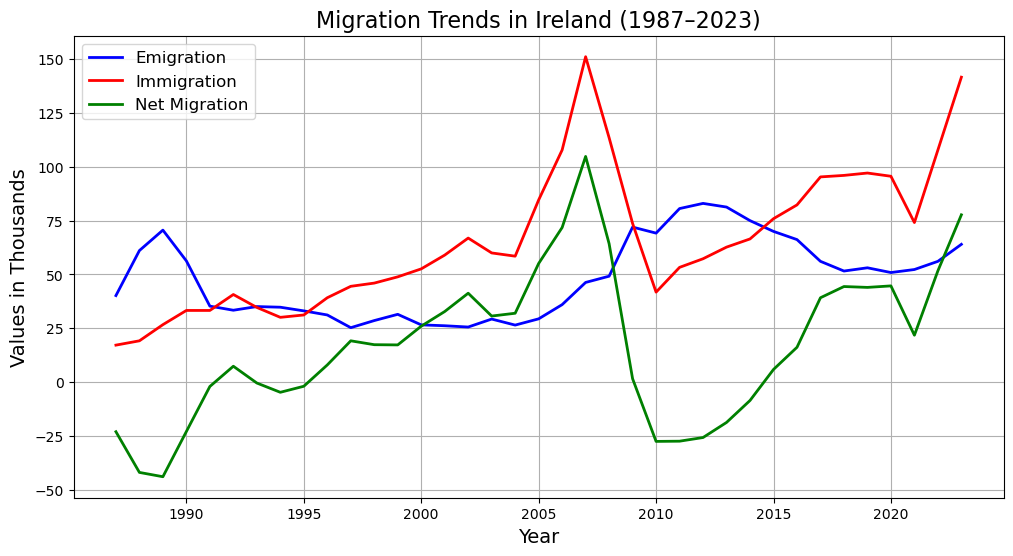

In [15]:
#using matplotlib library to plot a line chart, reading in 3 x values and 1 y value initialised from previous cell
#plt.plot(w, z, label='Net migration', color='green')
#plt.plot(w, x, label='Emigration', color='blue')
#plt.plot(w, y, label='Immigration', color='red')

#plt.legend()

#plt.ylabel('Values in thousands', fontsize=12)
#plt.xlabel('Year', fontsize=12)
#plt.title('Migration pattern Ireland 1987-2023', fontsize=14)

#plt.show()


import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.plot(w, x, label='Emigration', color='blue', linewidth=2)
plt.plot(w, y, label='Immigration', color='red', linewidth=2)
plt.plot(w, z, label='Net Migration', color='green', linewidth=2)

plt.title('Migration Trends in Ireland (1987–2023)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Values in Thousands', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

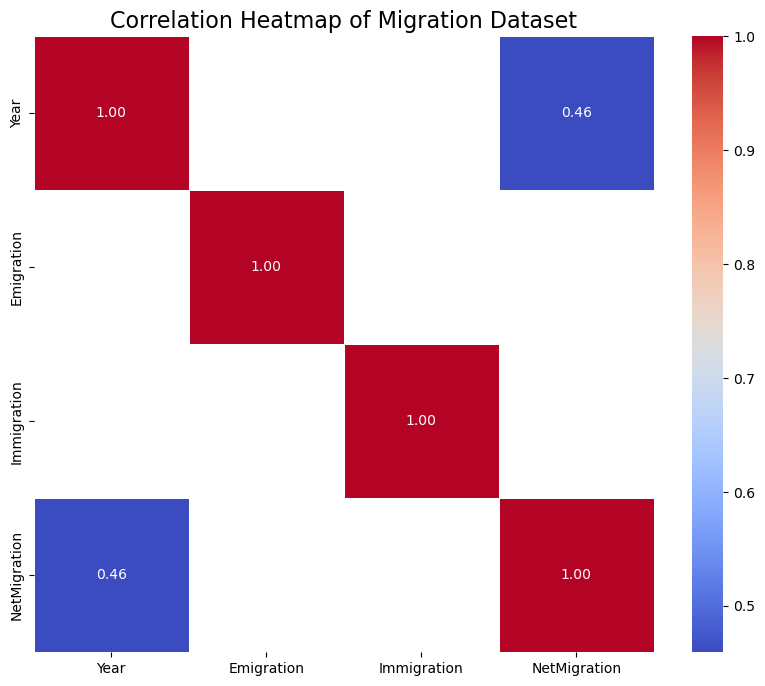

In [16]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Build a new DataFrame if your variables aren't already in one table
# Example: if you have w (years), x (emigration), y (immigration), z (net migration), and other variables
data = pd.DataFrame({
    'Year': w,
    'Emigration': x,
    'Immigration': y,
    'NetMigration': z
    # You can add other variables here if you have them
})

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Migration Dataset', fontsize=16)
plt.show()

In [17]:
#taking a look at migration over 36 years, mean, mode and std dev then doing normal
#distrubtion curve of results at devs out for full set and last 5 years to see how law of large numbers effects.


Emigrants.describe()

,Year,VALUE
count,37.000000,37.000000
mean,2005.000000,48.459459
std,10.824355,18.520371
min,1987.000000,25.300000
25%,1996.000000,31.500000
50%,2005.000000,49.200000
75%,2014.000000,64.000000
max,2023.000000,83.000000


In [18]:
Emigrants 

,STATISTIC Label,Year,Country,Sex,Origin or Destination,UNIT,VALUE
46,Estimated Migration (Persons in April),1987,All countries,Both sexes,Emigrants: All destinations,Thousand,40.2
118,Estimated Migration (Persons in April),1988,All countries,Both sexes,Emigrants: All destinations,Thousand,61.1
190,Estimated Migration (Persons in April),1989,All countries,Both sexes,Emigrants: All destinations,Thousand,70.6
262,Estimated Migration (Persons in April),1990,All countries,Both sexes,Emigrants: All destinations,Thousand,56.3
334,Estimated Migration (Persons in April),1991,All countries,Both sexes,Emigrants: All destinations,Thousand,35.3
406,Estimated Migration (Persons in April),1992,All countries,Both sexes,Emigrants: All destinations,Thousand,33.4
478,Estimated Migration (Persons in April),1993,All countries,Both sexes,Emigrants: All destinations,Thousand,35.1
550,Estimated Migration (Persons in April),1994,All countries,Both sexes,Emigrants: All destinations,Thousand,34.8
622,Estimated Migration (Persons in April),1995,All countries,Both sexes,Emigrants: All destinations,Thousand,33.1
694,Estimated Migration (Persons in April),1996,All countries,Both sexes,Emigrants: All destinations,Thousand,31.2


In [19]:

    Emigrants_mean = 48.459459
Emigrants_std = 18.520371
print(Emigrants.min())
print(Emigrants.max())
#finding min and max values from my data

STATISTIC Label          Estimated Migration (Persons in April)
Year                                                       1987
Country                                           All countries
Sex                                                  Both sexes
Origin or Destination               Emigrants: All destinations
UNIT                                                   Thousand
VALUE                                                      25.3
dtype: object
STATISTIC Label          Estimated Migration (Persons in April)
Year                                                       2023
Country                                           All countries
Sex                                                  Both sexes
Origin or Destination               Emigrants: All destinations
UNIT                                                   Thousand
VALUE                                                      83.0
dtype: object


In [20]:
#for loop used because we know how many iterations in the sequence
#assume mu has most instinces so run first in loop then std dev 1 then 2
#using a foor loop because I know how many iterations are need in my loop. assigning values to show distribution 
mu = Emigrants_mean 
mu_σ = Emigrants_mean + Emigrants_std
mu_2σ = Emigrants_mean + Emigrants_std + Emigrants_std
mu__less_σ = Emigrants_mean - Emigrants_std
mu__less_2σ = Emigrants_mean - Emigrants_std - Emigrants_std

a = b = c = d = e =  0




for i in Emigrants["VALUE"]:
    
    if i < mu_σ and i > mu__less_σ: # value 3
          c+=1
    elif i < mu_2σ and i > mu_σ: #value 4
          d+=1
    elif i > mu__less_2σ and i < mu__less_σ: #value 2
          b+=1
    elif i > mu_2σ: # value 5
          e+=1
    else: #value 1
          a+=1

In [21]:
data = {'std_from_mean': ['mu__less_2σ', 'mu__less_σ', 'mu', 'mu_σ', 'mu_2σ'],
       'Values': [a,b,c,d,e]}
df=pd.DataFrame(data)
df

,std_from_mean,Values
0,mu__less_2σ,0
1,mu__less_σ,8
2,mu,21
3,mu_σ,8
4,mu_2σ,0


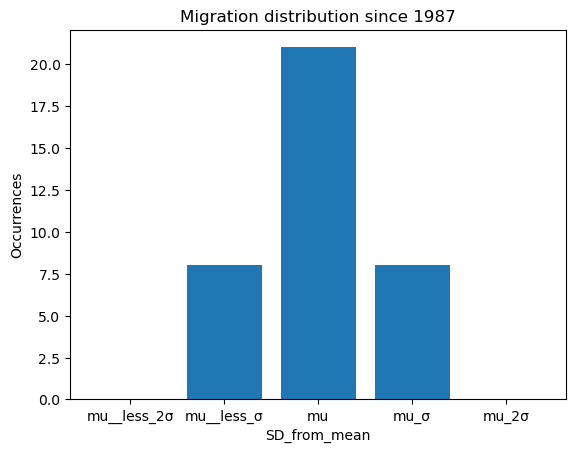

In [22]:
fig, ax = plt.subplots()

ax.bar(df["std_from_mean"], df["Values"],)
ax.set_ylabel('Occurrences')
ax.set_xlabel('SD_from_mean')
ax.set_title('Migration distribution since 1987')


plt.show()
#plotting bar chart from matplotlib

In [23]:
#check distribution of 10 most recent years

m=n=o=p=q=0
    
for i in Emigrants["VALUE"].tail(10):
   
    
    
    if i < mu_σ and i > mu__less_σ: # value 3
          o+=1
         
    elif i < mu_2σ and i > mu_σ: #value 4
          p+=1
    elif i > mu__less_2σ and i < mu__less_σ: #value 2
          n+=1
    elif i > mu_2σ: # value 5
          q+=1
    else: #value 1
          m+=1

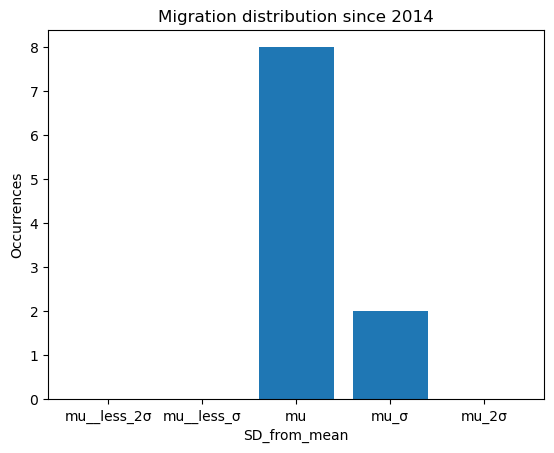

In [24]:
data2 = {'std_from_mean': ['mu__less_2σ', 'mu__less_σ', 'mu', 'mu_σ', 'mu_2σ'],
       'Values': [m,n,o,p,q]}
df2=pd.DataFrame(data2)
df2

fig, ax = plt.subplots()

ax.bar(df2["std_from_mean"], df2["Values"],)
ax.set_ylabel('Occurrences')
ax.set_xlabel('SD_from_mean')
ax.set_title('Migration distribution since 2014')


plt.show()

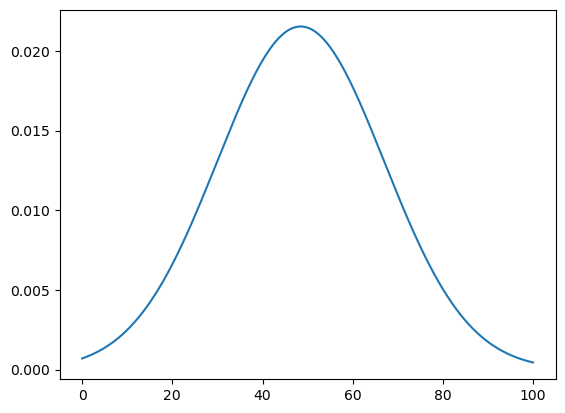

In [25]:
# Plot between 0 and 100 with .01 steps.
x_axis = np.arange(0, 100, 0.01)
plt.plot(x_axis, norm.pdf(x_axis,Emigrants_mean,Emigrants_std))
plt.show()


We can see that the distribution is not as normal as the larger set due to law of large numbers

In [26]:
propertyprice.head()

,YEAR,Annual New Property prices,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,National,Dublin,Cork,Galway,Limerick,Waterford,Other Areas,NaN,NaN,NaN,NaN,NaN,NaN
1,1969/70,"6,692","7,051",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1970/71,"7,523","7,913","6,632","6,976","6,012","6,105","6,427",NaN,NaN,NaN,NaN,NaN,NaN
3,1971/72,"8,249","8,528","7,676","8,867","6,733","6,227","7,198",NaN,NaN,NaN,NaN,NaN,NaN
4,1972/73,"9,009","9,206","7,678","9,405","7,450","6,928","8,054",NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
#Binomial distribution. given 100 years how likely is it that the amount
#of migrants is higher than 2 standard deviations away from the mean
#what are the chances that by year 2123 we have at least 1 value of 2 std dev migration

#this shows 5% are outside the 2 std dev



n = 100
x = 0
p = 1-norm.cdf(83, Emigrants_mean, Emigrants_std)
q = 1-p

binom.sf(x,n,p)
#probability x>=1
#calling from the binom to calculate binomial distribution given the variables above

0.9575066785959107

In [28]:
n = 5
x = 4
p = norm.cdf( 75, Emigrants_mean, Emigrants_std)
q = 1-p

binom.sf(x,n,p)
#probability x=5

0.6738175135107497

In [29]:
n = 5
x = 4
p = norm.cdf(75, Emigrants_mean, Emigrants_std)
q = 1-p

binom.sf(x,n,p)

0.6738175135107497

lets look at what the probability was that there is exactly 8 occurances out of 37 years for the migration graph between the value of 1 and 2 standard deviations.

In [30]:
Population1 = Population.loc[Population["Year"]  == 2019]
Population1 = Population1.loc[Population["Sex"]  == "Both sexes"]


Population1["Region"].unique()

array(['State', 'Border', 'West', 'Mid-West', 'South-East', 'South-West',
       'Dublin', 'Mid-East', 'Midland'], dtype=object)

In [31]:
Population1 = Population.loc[Population["Year"]  == 2019]

In [32]:
Population1.duplicated().sum()

0

In [33]:
Population1.shape

(513, 7)

In [34]:
Population1

,STATISTIC Label,Year,Age Group,Sex,Region,UNIT,VALUE
4104,Estimated Population (Persons in April),2019,0 - 4 years,Both sexes,State,Thousand,315.0
4105,Estimated Population (Persons in April),2019,0 - 4 years,Both sexes,Border,Thousand,24.2
4106,Estimated Population (Persons in April),2019,0 - 4 years,Both sexes,West,Thousand,28.9
4107,Estimated Population (Persons in April),2019,0 - 4 years,Both sexes,Mid-West,Thousand,28.8
4108,Estimated Population (Persons in April),2019,0 - 4 years,Both sexes,South-East,Thousand,25.7
...,...,...,...,...,...,...,...
4612,Estimated Population (Persons in April),2019,All ages,Female,South-East,Thousand,220.5
4613,Estimated Population (Persons in April),2019,All ages,Female,South-West,Thousand,357.6
4614,Estimated Population (Persons in April),2019,All ages,Female,Dublin,Thousand,715.4
4615,Estimated Population (Persons in April),2019,All ages,Female,Mid-East,Thousand,368.0


In [35]:
Population2 = Population1.loc[Population1["Age Group"]  == "All ages"]

In [36]:
Population2

,STATISTIC Label,Year,Age Group,Sex,Region,UNIT,VALUE
4590,Estimated Population (Persons in April),2019,All ages,Both sexes,State,Thousand,4958.5
4591,Estimated Population (Persons in April),2019,All ages,Both sexes,Border,Thousand,409.9
4592,Estimated Population (Persons in April),2019,All ages,Both sexes,West,Thousand,464.8
4593,Estimated Population (Persons in April),2019,All ages,Both sexes,Mid-West,Thousand,493.4
4594,Estimated Population (Persons in April),2019,All ages,Both sexes,South-East,Thousand,440.1
4595,Estimated Population (Persons in April),2019,All ages,Both sexes,South-West,Thousand,710.6
4596,Estimated Population (Persons in April),2019,All ages,Both sexes,Dublin,Thousand,1398.8
4597,Estimated Population (Persons in April),2019,All ages,Both sexes,Mid-East,Thousand,731.9
4598,Estimated Population (Persons in April),2019,All ages,Both sexes,Midland,Thousand,309.0
4599,Estimated Population (Persons in April),2019,All ages,Male,State,Thousand,2456.3


In [37]:
Migration2023 = Migration.loc[Migration["Year"]  == 2023]

Migration2023

,STATISTIC Label,Year,Country,Sex,Origin or Destination,UNIT,VALUE
2592,Estimated Migration (Persons in April),2023,United Kingdom (1),Both sexes,Net migration,Thousand,3.8
2593,Estimated Migration (Persons in April),2023,United Kingdom (1),Both sexes,Emigrants: All destinations,Thousand,14.6
2594,Estimated Migration (Persons in April),2023,United Kingdom (1),Both sexes,Immigrants: All origins,Thousand,18.4
2595,Estimated Migration (Persons in April),2023,United Kingdom (1),Male,Net migration,Thousand,-0.9
2596,Estimated Migration (Persons in April),2023,United Kingdom (1),Male,Emigrants: All destinations,Thousand,9.9
...,...,...,...,...,...,...,...
2659,Estimated Migration (Persons in April),2023,EU15 to EU27 (accession countries joined post ...,Male,Emigrants: All destinations,Thousand,3.6
2660,Estimated Migration (Persons in April),2023,EU15 to EU27 (accession countries joined post ...,Male,Immigrants: All origins,Thousand,3.9
2661,Estimated Migration (Persons in April),2023,EU15 to EU27 (accession countries joined post ...,Female,Net migration,Thousand,-0.2
2662,Estimated Migration (Persons in April),2023,EU15 to EU27 (accession countries joined post ...,Female,Emigrants: All destinations,Thousand,5.2


assume that for age group we take the middle age we will calculate the mean, median, mode of the data.

In [38]:


xval = ('0-14', '15-24', '25-44','45-64','65 and over')
yval = (0.085938, 0.310937, 0.504687, 0.082812, 0.015625)

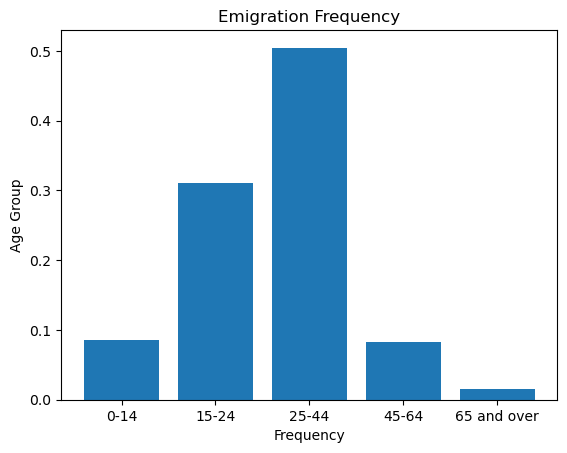

In [39]:
fig, ax = plt.subplots()
ax.bar(xval, yval)
ax.set_ylabel('Age Group')
ax.set_xlabel('Frequency')
ax.set_title('Emigration Frequency')
bar_colors = ['tab:blue']
plt.show()



In [40]:
propertyprice.head()

,YEAR,Annual New Property prices,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,National,Dublin,Cork,Galway,Limerick,Waterford,Other Areas,NaN,NaN,NaN,NaN,NaN,NaN
1,1969/70,"6,692","7,051",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1970/71,"7,523","7,913","6,632","6,976","6,012","6,105","6,427",NaN,NaN,NaN,NaN,NaN,NaN
3,1971/72,"8,249","8,528","7,676","8,867","6,733","6,227","7,198",NaN,NaN,NaN,NaN,NaN,NaN
4,1972/73,"9,009","9,206","7,678","9,405","7,450","6,928","8,054",NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
propertyprice.duplicated().sum()

45

In [42]:
Rowholder = propertyprice.head(1)

Rowholder


,YEAR,Annual New Property prices,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,National,Dublin,Cork,Galway,Limerick,Waterford,Other Areas,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:


Rowholder.at[0, 'YEAR'] = "Year"
Rowholder

,YEAR,Annual New Property prices,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Year,National,Dublin,Cork,Galway,Limerick,Waterford,Other Areas,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
propertyprice = propertyprice[propertyprice['YEAR'].notna()]



In [45]:
propertyprice

,YEAR,Annual New Property prices,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Year,National,Dublin,Cork,Galway,Limerick,Waterford,Other Areas,NaN,NaN,NaN,NaN,NaN,NaN
1,1969/70,"6,692","7,051",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1970/71,"7,523","7,913","6,632","6,976","6,012","6,105","6,427",NaN,NaN,NaN,NaN,NaN,NaN
3,1971/72,"8,249","8,528","7,676","8,867","6,733","6,227","7,198",NaN,NaN,NaN,NaN,NaN,NaN
4,1972/73,"9,009","9,206","7,678","9,405","7,450","6,928","8,054",NaN,NaN,NaN,NaN,NaN,NaN
5,1974,"10,836","10,943","9,809","13,356","10,515","9,571","10,851",NaN,NaN,NaN,NaN,NaN,NaN
6,1975,"13,254","13,137","12,921","14,420","13,594","12,636","13,833",NaN,NaN,NaN,NaN,NaN,NaN
7,1976,"15,564","15,342","15,347","17,842","15,279","13,900","15,361",NaN,NaN,NaN,NaN,NaN,NaN
8,1977,"18,754","19,055","18,652","21,715","19,992","17,296","18,025",NaN,NaN,NaN,NaN,NaN,NaN
9,1978,"24,082","25,745","22,460","26,244","23,077","21,295","22,839",NaN,NaN,NaN,NaN,NaN,NaN


show this plotted on a graph with line going through like stocks.
median, mean change?
need running total percentage increase
line chart

In [46]:
Migration1

,STATISTIC Label,Year,Country,Sex,Origin or Destination,UNIT,VALUE
45,Estimated Migration (Persons in April),1987,All countries,Both sexes,Net migration,Thousand,-23.0
46,Estimated Migration (Persons in April),1987,All countries,Both sexes,Emigrants: All destinations,Thousand,40.2
47,Estimated Migration (Persons in April),1987,All countries,Both sexes,Immigrants: All origins,Thousand,17.2
117,Estimated Migration (Persons in April),1988,All countries,Both sexes,Net migration,Thousand,-41.9
118,Estimated Migration (Persons in April),1988,All countries,Both sexes,Emigrants: All destinations,Thousand,61.1
...,...,...,...,...,...,...,...
2566,Estimated Migration (Persons in April),2022,All countries,Both sexes,Emigrants: All destinations,Thousand,56.1
2567,Estimated Migration (Persons in April),2022,All countries,Both sexes,Immigrants: All origins,Thousand,107.8
2637,Estimated Migration (Persons in April),2023,All countries,Both sexes,Net migration,Thousand,77.7
2638,Estimated Migration (Persons in April),2023,All countries,Both sexes,Emigrants: All destinations,Thousand,64.0


In [47]:
Migration1.dtypes
#checking if year is int for drop condition

STATISTIC Label           object
Year                       int64
Country                   object
Sex                       object
Origin or Destination     object
UNIT                      object
VALUE                    float64
dtype: object

In [48]:
Migration1.drop(Migration1[Migration1.Year >2015].index, inplace=True)

In [49]:
Migration1

,STATISTIC Label,Year,Country,Sex,Origin or Destination,UNIT,VALUE
45,Estimated Migration (Persons in April),1987,All countries,Both sexes,Net migration,Thousand,-23.0
46,Estimated Migration (Persons in April),1987,All countries,Both sexes,Emigrants: All destinations,Thousand,40.2
47,Estimated Migration (Persons in April),1987,All countries,Both sexes,Immigrants: All origins,Thousand,17.2
117,Estimated Migration (Persons in April),1988,All countries,Both sexes,Net migration,Thousand,-41.9
118,Estimated Migration (Persons in April),1988,All countries,Both sexes,Emigrants: All destinations,Thousand,61.1
...,...,...,...,...,...,...,...
1990,Estimated Migration (Persons in April),2014,All countries,Both sexes,Emigrants: All destinations,Thousand,75.0
1991,Estimated Migration (Persons in April),2014,All countries,Both sexes,Immigrants: All origins,Thousand,66.5
2061,Estimated Migration (Persons in April),2015,All countries,Both sexes,Net migration,Thousand,5.9
2062,Estimated Migration (Persons in April),2015,All countries,Both sexes,Emigrants: All destinations,Thousand,70.0


In [50]:
#i want net migration each year

netmigration = Migration1.loc[Migration1["Origin or Destination"]  == "Emigrants: All destinations"]
netmigration

,STATISTIC Label,Year,Country,Sex,Origin or Destination,UNIT,VALUE
46,Estimated Migration (Persons in April),1987,All countries,Both sexes,Emigrants: All destinations,Thousand,40.2
118,Estimated Migration (Persons in April),1988,All countries,Both sexes,Emigrants: All destinations,Thousand,61.1
190,Estimated Migration (Persons in April),1989,All countries,Both sexes,Emigrants: All destinations,Thousand,70.6
262,Estimated Migration (Persons in April),1990,All countries,Both sexes,Emigrants: All destinations,Thousand,56.3
334,Estimated Migration (Persons in April),1991,All countries,Both sexes,Emigrants: All destinations,Thousand,35.3
406,Estimated Migration (Persons in April),1992,All countries,Both sexes,Emigrants: All destinations,Thousand,33.4
478,Estimated Migration (Persons in April),1993,All countries,Both sexes,Emigrants: All destinations,Thousand,35.1
550,Estimated Migration (Persons in April),1994,All countries,Both sexes,Emigrants: All destinations,Thousand,34.8
622,Estimated Migration (Persons in April),1995,All countries,Both sexes,Emigrants: All destinations,Thousand,33.1
694,Estimated Migration (Persons in April),1996,All countries,Both sexes,Emigrants: All destinations,Thousand,31.2


In [51]:
netmigration["Country"].unique()

array(['All countries'], dtype=object)

In [52]:
netmigration = netmigration.loc[netmigration["Country"]  == "All countries"]
netmigration

,STATISTIC Label,Year,Country,Sex,Origin or Destination,UNIT,VALUE
46,Estimated Migration (Persons in April),1987,All countries,Both sexes,Emigrants: All destinations,Thousand,40.2
118,Estimated Migration (Persons in April),1988,All countries,Both sexes,Emigrants: All destinations,Thousand,61.1
190,Estimated Migration (Persons in April),1989,All countries,Both sexes,Emigrants: All destinations,Thousand,70.6
262,Estimated Migration (Persons in April),1990,All countries,Both sexes,Emigrants: All destinations,Thousand,56.3
334,Estimated Migration (Persons in April),1991,All countries,Both sexes,Emigrants: All destinations,Thousand,35.3
406,Estimated Migration (Persons in April),1992,All countries,Both sexes,Emigrants: All destinations,Thousand,33.4
478,Estimated Migration (Persons in April),1993,All countries,Both sexes,Emigrants: All destinations,Thousand,35.1
550,Estimated Migration (Persons in April),1994,All countries,Both sexes,Emigrants: All destinations,Thousand,34.8
622,Estimated Migration (Persons in April),1995,All countries,Both sexes,Emigrants: All destinations,Thousand,33.1
694,Estimated Migration (Persons in April),1996,All countries,Both sexes,Emigrants: All destinations,Thousand,31.2


In [53]:
netmigration["VALUE"].sum()

1342.6999999999998

In [54]:
#number2 = 0
#while number2 <=len(netmigration):
 #  a2 = (netmigration["VALUE"].iloc[[2]])
  # b2 = (netmigration["VALUE"].iloc[[number2+1]])
  # c2 = (100 * float(b2) / float(a2))
   
  # rounded_c2 = round(c2, 2)
  # print(rounded_c2)
   #netmigration["National price percentage increase running total"].loc[[number2+1]] = rounded_c2

  # number2 += 1

In [55]:
LifeExpectancy2.dtypes


date                 object
 Population           int64
 Annual % Change    float64
dtype: object

In [56]:

Populationireland

,date,Life Expectancy from Birth (Years),Annual % Change
0,1987-12-31,74.012,0.28
1,1988-12-31,74.220,0.28
2,1989-12-31,74.446,0.30
3,1990-12-31,74.672,0.30
4,1991-12-31,74.898,0.30
5,1992-12-31,75.124,0.30
6,1993-12-31,75.350,0.30
7,1994-12-31,75.488,0.18
8,1995-12-31,75.626,0.18
9,1996-12-31,75.764,0.18


In [57]:
netmigration

,STATISTIC Label,Year,Country,Sex,Origin or Destination,UNIT,VALUE
46,Estimated Migration (Persons in April),1987,All countries,Both sexes,Emigrants: All destinations,Thousand,40.2
118,Estimated Migration (Persons in April),1988,All countries,Both sexes,Emigrants: All destinations,Thousand,61.1
190,Estimated Migration (Persons in April),1989,All countries,Both sexes,Emigrants: All destinations,Thousand,70.6
262,Estimated Migration (Persons in April),1990,All countries,Both sexes,Emigrants: All destinations,Thousand,56.3
334,Estimated Migration (Persons in April),1991,All countries,Both sexes,Emigrants: All destinations,Thousand,35.3
406,Estimated Migration (Persons in April),1992,All countries,Both sexes,Emigrants: All destinations,Thousand,33.4
478,Estimated Migration (Persons in April),1993,All countries,Both sexes,Emigrants: All destinations,Thousand,35.1
550,Estimated Migration (Persons in April),1994,All countries,Both sexes,Emigrants: All destinations,Thousand,34.8
622,Estimated Migration (Persons in April),1995,All countries,Both sexes,Emigrants: All destinations,Thousand,33.1
694,Estimated Migration (Persons in April),1996,All countries,Both sexes,Emigrants: All destinations,Thousand,31.2


In [58]:
#netmigrationvalue= netmigration["VALUE"]
#netmigrationvalue.rename('0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29')

In [59]:
#index= ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29']
#netmigrationvalue.rename(index={'1':'29'})

In [60]:
df6 = pd.concat([Populationireland, LifeExpectancy2, BirthRate, DeathRate], axis=1)
#using concat from pandas to combine different datasets

In [61]:
df6 = df6.drop(df6.columns[[2,5,8]],axis = 1)

In [62]:
df6.columns.values[0] = "Year"
df6["Emigration in thousand"] = [40.2, 61.1, 70.6, 56.3, 35.3, 33.4, 35.1, 34.8, 33.1, 31.2, 25.3, 28.6, 31.5, 26.6, 26.2, 25.6, 29.3, 26.5, 29.4, 36.0, 46.3, 49.2, 72.0, 69.2, 80.6, 83.0, 81.3, 75.0, 70.0]
df6

#I want the values from netmigration but the row indexing do not ascend by 1.
#I had to type the values out to get the code to work for my case. 

,Year,Life Expectancy from Birth (Years),date,Population,date,Births per 1000 People,date,Deaths per 1000 People,Emigration in thousand
0,1987-12-31,74.012,1987-12-31,3513700,1987-12-31,16.932,1987-12-31,9.026,40.2
1,1988-12-31,74.220,1988-12-31,3498030,1988-12-31,16.128,1988-12-31,8.959,61.1
2,1989-12-31,74.446,1989-12-31,3483314,1989-12-31,15.710,1989-12-31,8.886,70.6
3,1990-12-31,74.672,1990-12-31,3485374,1990-12-31,15.293,1990-12-31,8.814,56.3
4,1991-12-31,74.898,1991-12-31,3504805,1991-12-31,14.875,1991-12-31,8.741,35.3
5,1992-12-31,75.124,1992-12-31,3528367,1992-12-31,14.458,1992-12-31,8.669,33.4
6,1993-12-31,75.350,1993-12-31,3545700,1993-12-31,14.040,1993-12-31,8.596,35.1
7,1994-12-31,75.488,1994-12-31,3559398,1994-12-31,14.059,1994-12-31,8.553,34.8
8,1995-12-31,75.626,1995-12-31,3579482,1995-12-31,14.077,1995-12-31,8.510,33.1
9,1996-12-31,75.764,1996-12-31,3606728,1996-12-31,14.096,1996-12-31,8.468,31.2


In [63]:
df6 = df6.drop(df6.columns[[2,4,6]],axis = 1)
df5=df6
#dropping extra data columns as they are unnecessary

In [64]:
df6.dtypes 

Year                                    object
 Life Expectancy from Birth (Years)    float64
 Population                              int64
 Births per 1000 People                float64
 Deaths per 1000 People                float64
Emigration in thousand                 float64
dtype: object

In [65]:
number = 1987
i=0
while i<29:
    df6["Year"].iloc[i] = number

    number+=1
    i+=1
df6

,Year,Life Expectancy from Birth (Years),Population,Births per 1000 People,Deaths per 1000 People,Emigration in thousand
0,1987,74.012,3513700,16.932,9.026,40.2
1,1988,74.220,3498030,16.128,8.959,61.1
2,1989,74.446,3483314,15.710,8.886,70.6
3,1990,74.672,3485374,15.293,8.814,56.3
4,1991,74.898,3504805,14.875,8.741,35.3
5,1992,75.124,3528367,14.458,8.669,33.4
6,1993,75.350,3545700,14.040,8.596,35.1
7,1994,75.488,3559398,14.059,8.553,34.8
8,1995,75.626,3579482,14.077,8.510,33.1
9,1996,75.764,3606728,14.096,8.468,31.2


In [66]:
df6.columns.values

array(['Year', ' Life Expectancy from Birth (Years)', ' Population',
       ' Births per 1000 People', ' Deaths per 1000 People',
       'Emigration in thousand'], dtype=object)

In [67]:
#EDA fix column names
df6.rename(columns = {" Life Expectancy from Birth (Years)": "Life_Expectancy_from_Birth_Years",
                      " Population": "Population",
                     " Births per 1000 People": "Births_per_1000_People",
                     " Deaths per 1000 People": "Deaths_per_1000_People",
                     "Emigration in thousand": "Emigration_in_thousand"}, inplace = True)
df6.head()

,Year,Life_Expectancy_from_Birth_Years,Population,Births_per_1000_People,Deaths_per_1000_People,Emigration_in_thousand
0,1987,74.012,3513700,16.932,9.026,40.2
1,1988,74.220,3498030,16.128,8.959,61.1
2,1989,74.446,3483314,15.710,8.886,70.6
3,1990,74.672,3485374,15.293,8.814,56.3
4,1991,74.898,3504805,14.875,8.741,35.3


<Axes: xlabel='Emigration_in_thousand'>

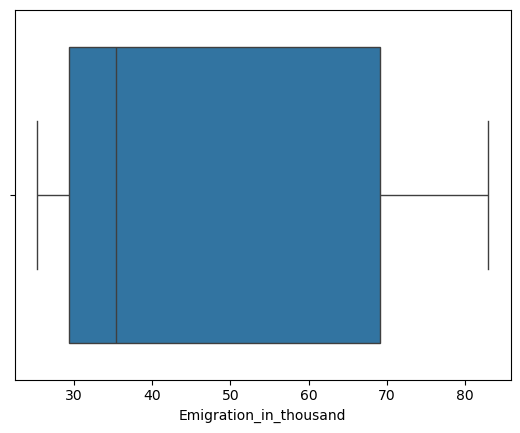

In [68]:
sns.boxplot(x=df6["Emigration_in_thousand"])
#using boxplot to search for outliers from seaborne library

<Axes: xlabel='Deaths_per_1000_People'>

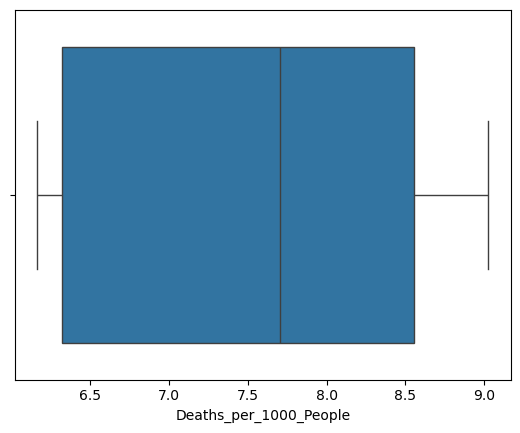

In [69]:
sns.boxplot(x=df6["Deaths_per_1000_People"])

<Axes: xlabel='Births_per_1000_People'>

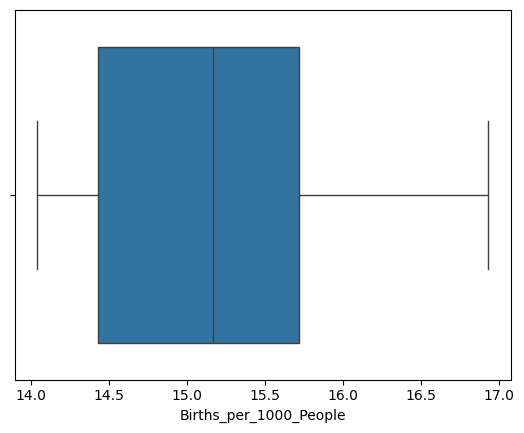

In [70]:
sns.boxplot(x=df6["Births_per_1000_People"])

<Axes: xlabel='Population'>

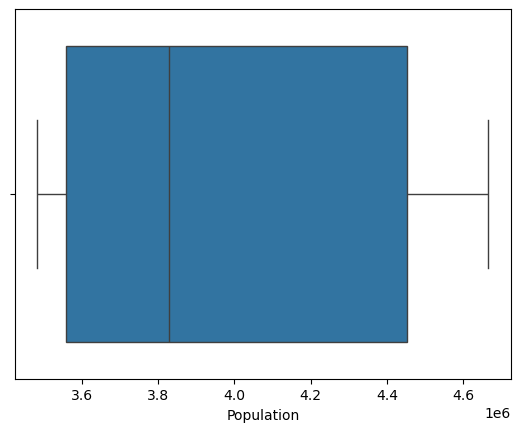

In [71]:
sns.boxplot(x=df6["Population"])

<Axes: xlabel='Life_Expectancy_from_Birth_Years'>

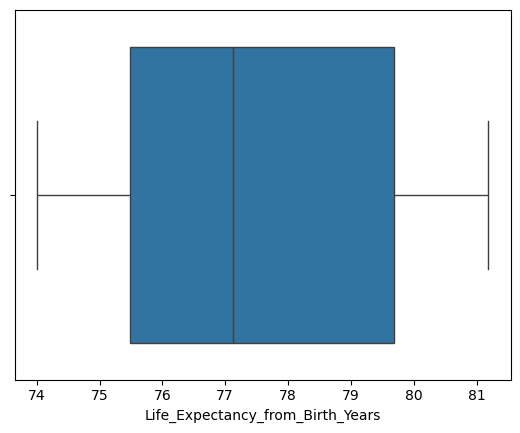

In [72]:
sns.boxplot(x=df6["Life_Expectancy_from_Birth_Years"])

In [73]:
df6.nunique(axis = 0)

Year                                29
Life_Expectancy_from_Birth_Years    29
Population                          29
Births_per_1000_People              29
Deaths_per_1000_People              29
Emigration_in_thousand              29
dtype: int64

In [74]:
#correlation between features
correlation = df6.corr()
print(correlation)

                                      Year  Life_Expectancy_from_Birth_Years  \
Year                              1.000000                          0.993361   
Life_Expectancy_from_Birth_Years  0.993361                          1.000000   
Population                        0.967906                          0.987764   
Births_per_1000_People            0.168871                          0.255937   
Deaths_per_1000_People           -0.976583                         -0.991816   
Emigration_in_thousand            0.476092                          0.529991   

                                  Population  Births_per_1000_People  \
Year                                0.967906                0.168871   
Life_Expectancy_from_Birth_Years    0.987764                0.255937   
Population                          1.000000                0.368233   
Births_per_1000_People              0.368233                1.000000   
Deaths_per_1000_People             -0.984947               -0.348618   
Emigrat

<Axes: >

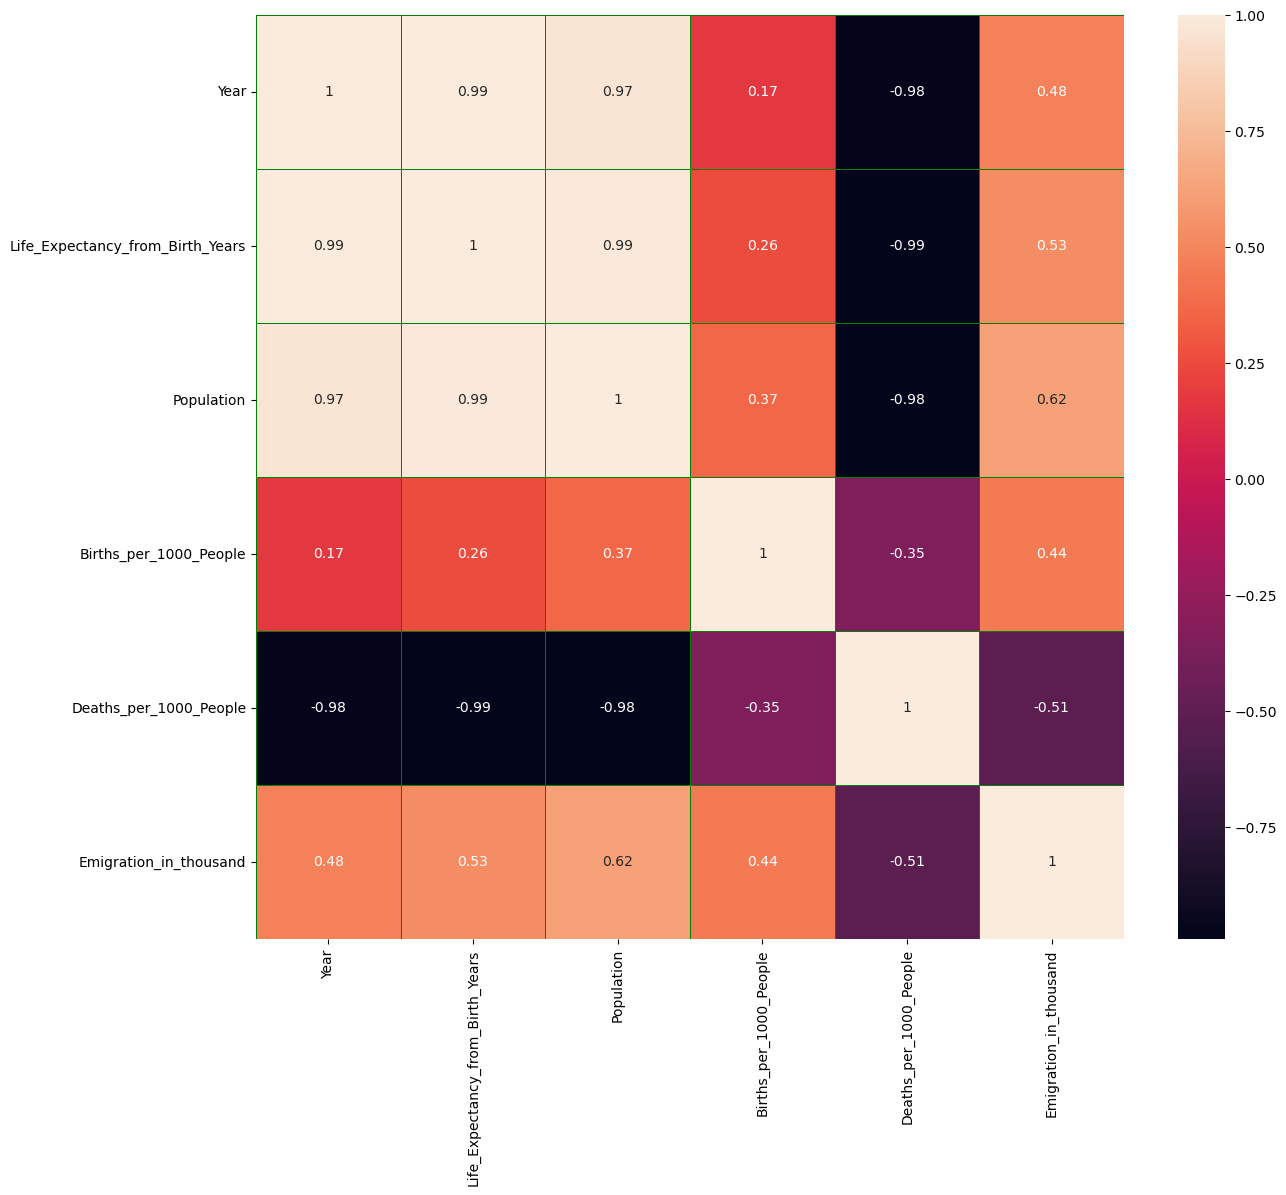

In [75]:
plt.figure(figsize=(14,12))
sns.heatmap(correlation,annot=True,linecolor="green",lw=0.7)
#using seaborne heatmap to show correlation

In [76]:
#I am looking for missing values
df6.isnull().sum()

Year                                0
Life_Expectancy_from_Birth_Years    0
Population                          0
Births_per_1000_People              0
Deaths_per_1000_People              0
Emigration_in_thousand              0
dtype: int64

In [77]:
df6.isnull().values.any()

False

In [78]:
scaler = StandardScaler()

df_scale = pd.DataFrame(scaler.fit_transform(df6),columns=df6.columns)

In [79]:
df_scale.head()

,Year,Life_Expectancy_from_Birth_Years,Population,Births_per_1000_People,Deaths_per_1000_People,Emigration_in_thousand
0,-1.673320,-1.502265,-1.055810,2.278927,1.377601,-0.306486
1,-1.553797,-1.410537,-1.092414,1.264369,1.313828,0.743604
2,-1.434274,-1.310870,-1.126789,0.736899,1.244344,1.220918
3,-1.314751,-1.211204,-1.121977,0.210692,1.175812,0.502435
4,-1.195229,-1.111537,-1.076588,-0.316778,1.106328,-0.552679


In [80]:
#seperating dataset into test and train. supervised machine learning
y = df6['Emigration_in_thousand']
X = df_scale.drop(['Emigration_in_thousand'],axis=1)

In [81]:
#setting test size to 0.2 and training size to 0.8 with random state 0.99 
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state= 99)

In [82]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(23, 5)
(6, 5)
(23,)
(6,)


In [83]:
lrm = LinearRegression()
lrm.fit(X_train, Y_train) #fit an OLS model
LinearRegression()

LinearRegression()

In [84]:
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)  #making lrm predictions

In [85]:
print("The R-squared of the model in training set is: {}".format(lrm.score(X_train, Y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lrm.score(X_test, Y_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(Y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - y_preds_test) / Y_test)) * 100))

The R-squared of the model in training set is: 0.7769299495151979
-----Test set statistics-----
R-squared of the model in test set is: 0.7538350206166292
Root mean squared error of the prediction is: 9.993512624776612
Mean absolute percentage error of the prediction is: 14.399529383392155


Usually, a RMSE score of less than 180 is considered a good score for a moderately or well working algorithm. In case, the RMSE value exceeds 180, we need to perform feature selection and hyper parameter tuning on the parameters of the model.

In [86]:
# Using GridSearch for parameter optimization
ridgeregr = GridSearchCV(Ridge(),
                    param_grid={
                        'alpha': [0.01, 0.1, 1]
                    }, verbose=1)

ridgeregr.fit(X_train, Y_train)

ridge = ridgeregr.best_estimator_


Fitting 5 folds for each of 3 candidates, totalling 15 fits


In [87]:
# Making predictions here
y_preds_train = ridge.predict(X_train)
y_preds_test_ridge = ridge.predict(X_test)

print("R-squared of the model in training set is: {}".format(ridge.score(X_train, Y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(ridge.score(X_test, Y_test)))
print("Root mean squared error of the prediction is: {}".format(mse(Y_test, y_preds_test_ridge)**(1/2)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - y_preds_test_ridge) / Y_test)) * 100))

R-squared of the model in training set is: 0.5075937634883345
-----Test set statistics-----
R-squared of the model in test set is: 0.6964421500922384
Root mean squared error of the prediction is: 11.097515630770854
Mean absolute percentage error of the prediction is: 20.398898084156674


In [88]:
# using GridSearch for parameter optimization
lassoregr = GridSearchCV(Lasso(),
                    param_grid={
                        'alpha': [0.01, 0.1, 1]
                    }, verbose=1)

lassoregr.fit(X_train, Y_train)

lasso = lassoregr.best_estimator_

Fitting 5 folds for each of 3 candidates, totalling 15 fits


In [89]:
# We are making predictions here
y_preds_train = lasso.predict(X_train)
y_preds_test_lasso = lasso.predict(X_test)

print("R-squared of the model in training set is: {}".format(lasso.score(X_train, Y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lasso.score(X_test, Y_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(Y_test, y_preds_test_lasso)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - y_preds_test_lasso) / Y_test)) * 100))

R-squared of the model in training set is: 0.3870984643923787
-----Test set statistics-----
R-squared of the model in test set is: 0.6056261374904166
Root mean squared error of the prediction is: 12.649084486284192
Mean absolute percentage error of the prediction is: 24.476567067038925


In [90]:
#using clustering to analyse the relationship between population and migration.
x = df5.iloc[:, [2,5]].values
df5.head()


,Year,Life_Expectancy_from_Birth_Years,Population,Births_per_1000_People,Deaths_per_1000_People,Emigration_in_thousand
0,1987,74.012,3513700,16.932,9.026,40.2
1,1988,74.220,3498030,16.128,8.959,61.1
2,1989,74.446,3483314,15.710,8.886,70.6
3,1990,74.672,3485374,15.293,8.814,56.3
4,1991,74.898,3504805,14.875,8.741,35.3


In [91]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 4, max_iter = 300, n_init = 10, random_state = 0)

y_kmeans = kmeans.fit_predict(x)

print(y_kmeans)

[3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 2 2 2 2 0 0 0 0 0 0 0 0 0]


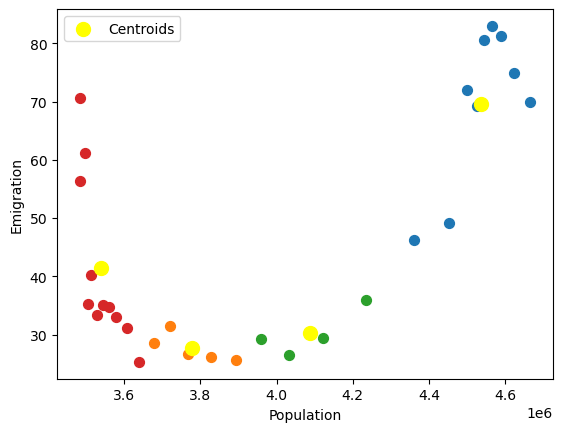

In [92]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 50)
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 50)
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 50)
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 50)

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1:2], s = 100, c = 'yellow', label = 'Centroids')
plt.xlabel('Population')
plt.ylabel('Emigration')

plt.legend() 

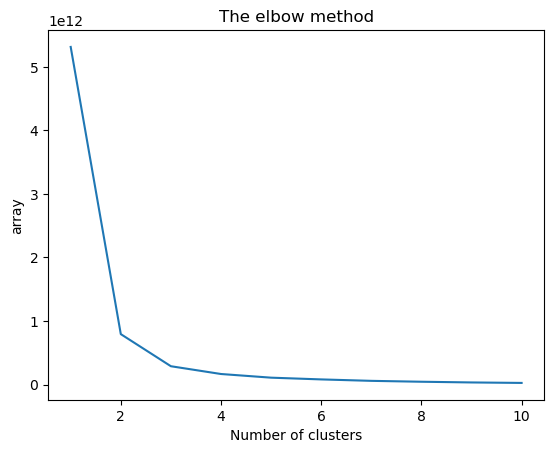

In [93]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
array = []                  # Declare an array

# Set the loop from the minimum and maximum values
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    array.append(kmeans.inertia_)
# inertia_float: Sum of squared distances of samples to their closest cluster center.

# Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), array)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('array')    # within cluster sum of squares
plt.show()

In [94]:


# define X variables and our target(y)
X = df5.drop(['Emigration_in_thousand'],axis=1).values
y = df5['Emigration_in_thousand'].values

# split Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [95]:
df5 = df5.astype({'Year':'int64'})


In [96]:
df5.dtypes

Year                                  int64
Life_Expectancy_from_Birth_Years    float64
Population                            int64
Births_per_1000_People              float64
Deaths_per_1000_People              float64
Emigration_in_thousand              float64
dtype: object

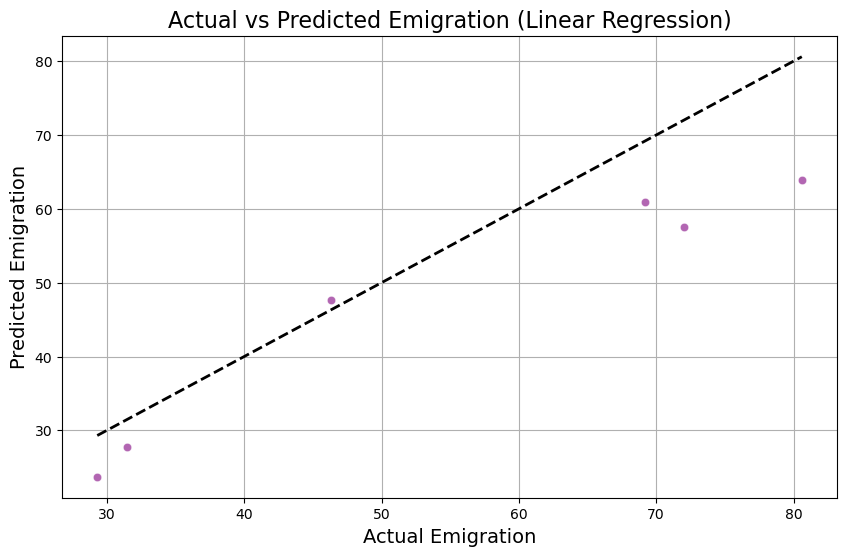

In [97]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, y_preds_test, alpha=0.6, color='purple', edgecolors='w', linewidth=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Emigration', fontsize=14)
plt.ylabel('Predicted Emigration', fontsize=14)
plt.title('Actual vs Predicted Emigration (Linear Regression)', fontsize=16)
plt.grid(True)
plt.show()

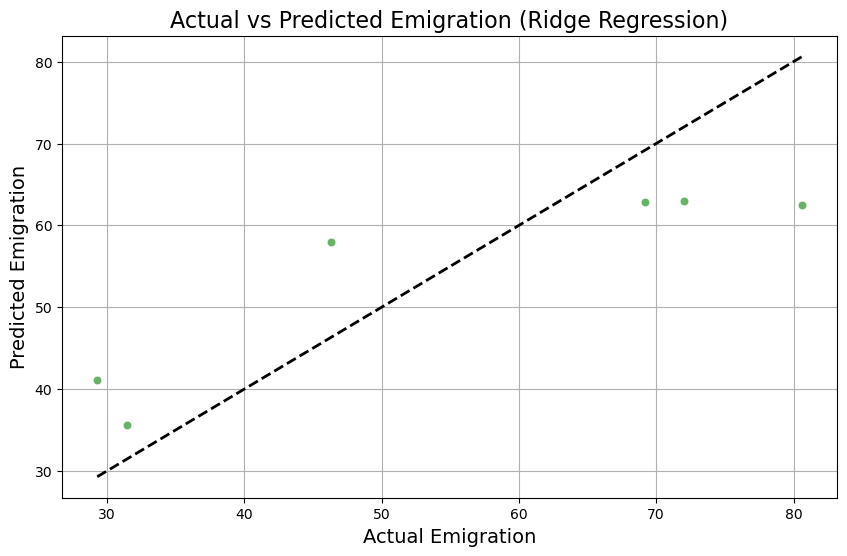

In [98]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, y_preds_test_ridge, alpha=0.6, color='green', edgecolors='w', linewidth=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Emigration', fontsize=14)
plt.ylabel('Predicted Emigration', fontsize=14)
plt.title('Actual vs Predicted Emigration (Ridge Regression)', fontsize=16)
plt.grid(True)
plt.show()

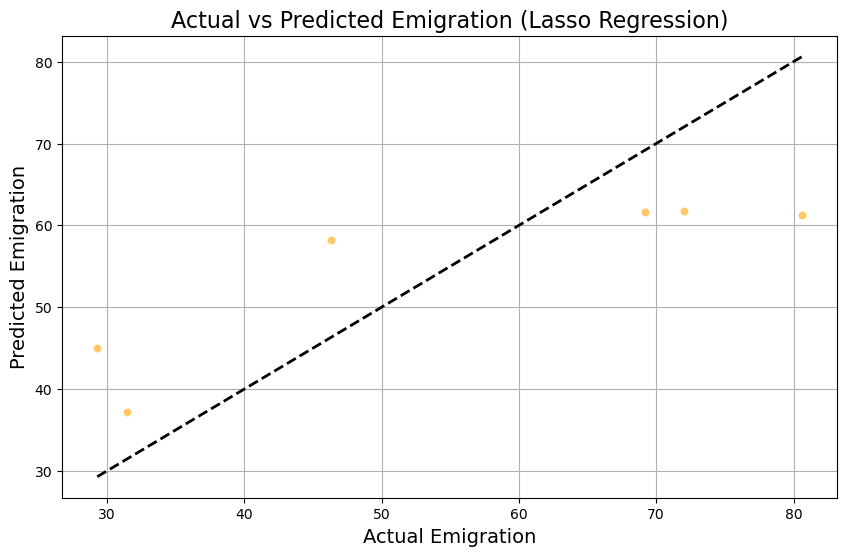

In [99]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, y_preds_test_lasso, alpha=0.6, color='orange', edgecolors='w', linewidth=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Emigration', fontsize=14)
plt.ylabel('Predicted Emigration', fontsize=14)
plt.title('Actual vs Predicted Emigration (Lasso Regression)', fontsize=16)
plt.grid(True)
plt.show()

### Actual vs Predicted Emigration

The following scatter plots show the relationship between the actual emigration values and the predicted values from my machine learning models. The dashed diagonal line represents a perfect prediction. 

In each plot, the closer the points are to this line, the better the model's performance. These plots provide a visual evaluation of each model's accuracy and help identify whether the models systematically overestimate or underestimate emigration.

- The Linear Regression model showed moderate predictive power but with some variance.
- Ridge Regression helped reduce potential overfitting and provided more stable predictions.
- Lasso Regression attempted to penalize complex relationships but appeared underfitted for this dataset.

In [100]:
!pip install --upgrade jupyterlab

In [101]:
!pip install pypandoc